### Name: Salama Nafei
### Task 3: Exploratory Data Analysis - Retail
### The Sparks Foundation - GRIP
### Objectives:-
- Perform Exploratory Data Analysis on dataset "Sample Superstore" 
- As a Business Manager, try to find out the weak areas where you can work to make more profit

## What you will see here is just discovering and cleaning the data, and i will use Tableau to do the visulazion part

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading Data
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#Exploring the shape of the data
df.shape

(9994, 13)

#### this data consist of (9994) rows, and (13) columns
#### The only column that i won't need is "Pstal Code" column, so i'm gonna delete it in the cleaning process.</p>

In [4]:
#Check for duplications
df.duplicated().sum()

17

#### there're onley 17 duplicated rows

### Let's see some summary statistics about the data

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#Inspecting for missing values to solve it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### All columns seems to be represented by appropriate data types

### Checking for null values

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### As we can see here there's no any null values at any column

### Data Cleaning
#### in this process we need to:
>
<ul>
    <li>Remove duplicate rows from the dataset.</li>
    <li>Remove the unused columns that we don't need in the analysis process.</li>
</ul>


#### 1: Removing duplicate rows

In [3]:
#### 1: Removing duplicate rows
df.drop_duplicates(inplace = True)

In [4]:
#one more check for duplicated rows
df.duplicated().sum()

0

#### 2: Removing unused columns

In [5]:
df.drop('Postal Code', axis = 1, inplace= True)

In [6]:
df.shape

(9977, 12)

#### After dropping unneccesesary columns, now we have (9977) rows and (11) columns

In [7]:
#save changes to a new csv file
df.to_csv('task_3.csv')

# <a id='eda'></a>
## Exploratory Data Analysis


## 1: Correlation between sales, profit, quantity, and discount.

<AxesSubplot:>

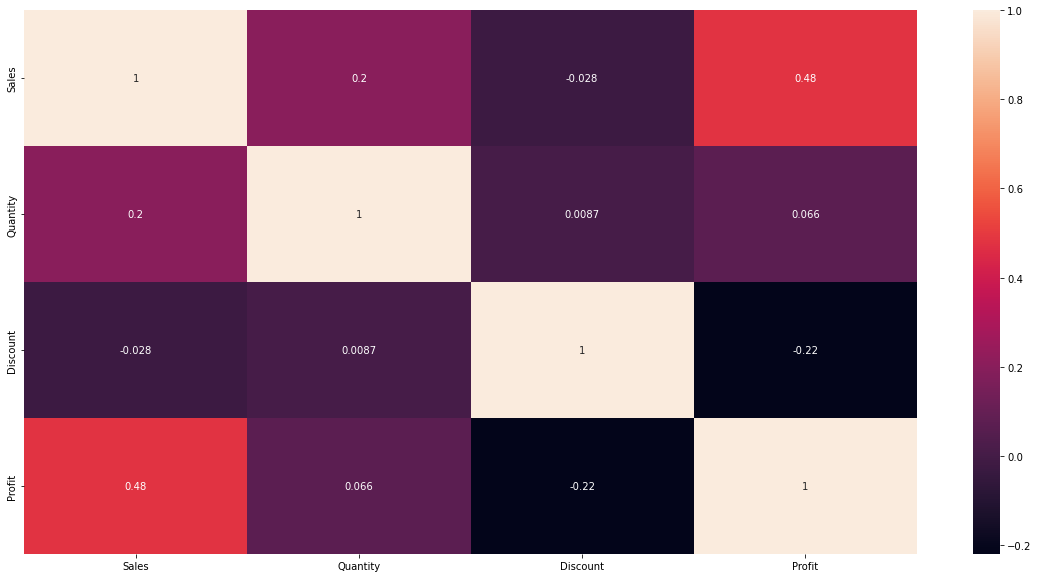

In [13]:
#Corelation between sales, profit, dicount, quantity
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True )

##### As we can see here, there's a positive correlation between sales and profit, while discount and profit have a negative correlation.

## 2: Which category has the highest number of orders, sales and profit?

c:\Users\salam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


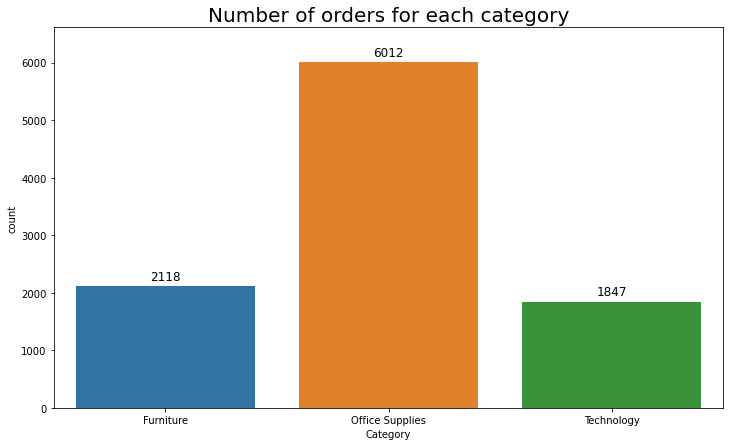

In [15]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df.Category)
ax.set_title("Number of orders for each category", fontsize = 20) 
ax.bar_label(ax.containers[0] , label_type='edge', fontsize = 12, padding = 3) #create annotation
ax.margins(y=0.1)

In [209]:
#Function for pie plot
def pie_plot (title,cat_column, num_column, explode_list = None):
    ###This function is used to make a pie plot###
    df_categ = df.groupby(cat_column)[num_column].sum()
    plt.rcParams["figure.figsize"] = [6,6]
    plt.rc('font', size = 15)
    plt.rcParams['axes.titlecolor'] = 'white'
    plt.title(title, fontdict={'fontsize':20})
    patches, texts, autotexts = plt.pie(df_categ, labels=df[cat_column].unique(), autopct='%1.1f%%',explode = explode_list,startangle=135)
    for text in texts:
        text.set_color('white')
    for autotext in autotexts:
        autotext.set_color('white')
    plt.show()
    

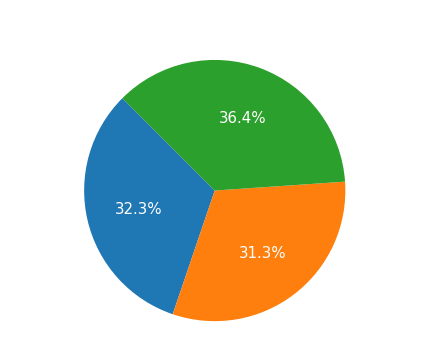

In [210]:
#Percentage of sales for each catogry
pie_plot('Percentage of sales for each catogry','Category','Sales');

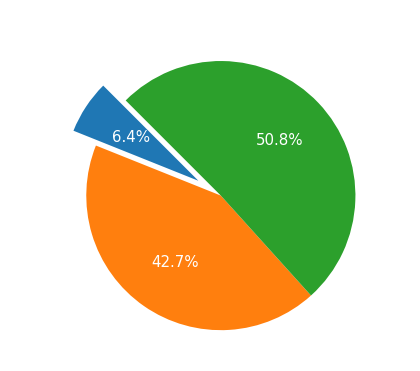

In [195]:
#Percentage of profit for each catogry
pie_plot('Percentage of profit for each catogry','Category','Profit',[0.2,0,0]);